In [52]:
import os
from torchvision.io import read_image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [62]:
# imagenetv2-matched-frequency-format-val
class DatasetImageNetv2(Dataset):
    def __init__(self, dataset_path, transform=None, target_transform=None):
        self.dataset_path = dataset_path
        self.transform = transform
        self.target_transform = target_transform
        
        labels = []
        classes=sorted([int(i) for i in os.listdir(dataset_path)])
        for cl in classes:
            for file_name in os.listdir(os.path.join(dataset_path, str(cl))):
                labels.append((cl, file_name))
        
        self.img_labels = labels

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        cl, file_name = self.img_labels[idx]
        img_path = os.path.join(self.dataset_path, str(cl), file_name)
        image = read_image(img_path)
        label = cl
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


val_data = DatasetImageNetv2(os.path.join("dataset","imagenetv2-matched-frequency-format-val"))
# TODO: add `batch_size>1` support with torchvision.transforms. This may be useless for the project as bathes are not accepted, but it may be useful for MEMO
val_dataloader = DataLoader(val_data, batch_size=1, shuffle=False)

Feature batch shape: torch.Size([1, 3, 480, 640])
Labels batch shape: torch.Size([1])


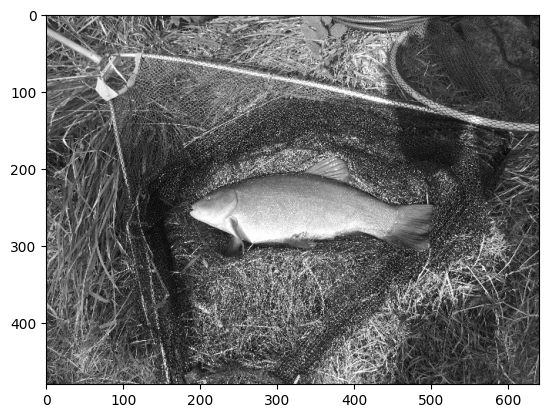

Label: 0


In [63]:
train_features, train_labels = next(iter(val_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

import numpy as np
img = train_features[0][0].numpy()  # Extracting the first channel and converting to NumPy array
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [66]:
class DatasetImageNetA(Dataset):
    def __init__(self, dataset_path, transform=None, target_transform=None):
        self.dataset_path = dataset_path
        self.transform = transform
        self.target_transform = target_transform

        with open(os.path.join(dataset_path ,"README.txt"), "r") as f:
            lines = f.readlines()[12:]

        self.mapping = {}
        for line in lines:
            split_line = line.split()
            if len(split_line) > 1:
                numeric_id = split_line[0][1:]
                name = " ".join(split_line[1:]).strip()
                self.mapping[int(numeric_id)] = name.lower()

        labels = []
        for cl in self.mapping.keys():
            for file_name in os.listdir(os.path.join(dataset_path, f"n{str(cl).zfill(8)}")):
                labels.append((cl, file_name)) 
        self.labels=labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.dataset_path, f"n{str(self.labels[idx][0]).zfill(8)}", self.labels[idx][1])
        image = read_image(img_path)
        label = self.labels[idx][0]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

val_data = DatasetImageNetA(os.path.join("dataset", "imagenet-a"))
val_dataloader = DataLoader(val_data, batch_size=1, shuffle=True)

Feature batch shape: torch.Size([1, 3, 343, 500])
Labels batch shape: torch.Size([1])


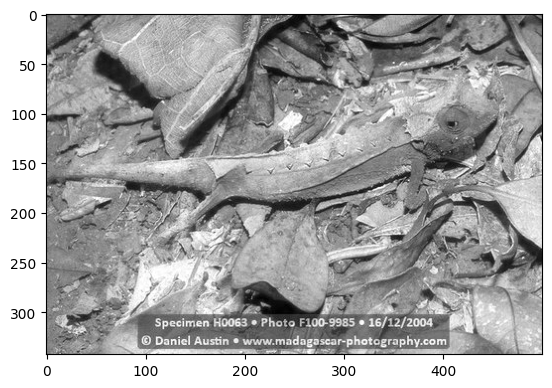

Label: 1694178


In [68]:
train_features, train_labels = next(iter(val_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0][0].numpy()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")